In [1]:
import csv
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
df=pd.read_csv('coronavirus.csv')

In [3]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [4]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [5]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [6]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [7]:
import seaborn as sns

In [8]:
#checking for categorical attributes
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
        
cat_col        

['Date', 'Country']

In [9]:
#print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Date
2020-04-03    188
2020-04-01    188
2020-04-04    188
2020-05-19    188
2020-02-26    188
             ... 
2020-05-01    188
2020-02-13    188
2020-04-19    188
2020-02-08    188
2020-02-16    188
Name: Date, Length: 126, dtype: int64

Country
Pakistan                            126
Burkina Faso                        126
Honduras                            126
Holy See                            126
Bahamas                             126
                                   ... 
Turkey                              126
Saint Vincent and the Grenadines    126
Philippines                         126
Benin                               126
Eswatini                            126
Name: Country, Length: 188, dtype: int64



In [10]:
le=LabelEncoder()

list1=['Date','Country']   #for labeling multiple columns
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [11]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,0,0,0,0,0
1,0,1,0,0,0
2,0,2,0,0,0
3,0,3,0,0,0
4,0,4,0,0,0
...,...,...,...,...,...
23683,125,183,429,365,3
23684,125,184,9,6,1
23685,125,185,249,10,49
23686,125,186,920,336,7


In [12]:
df.corr()

,Date,Country,Confirmed,Recovered,Deaths
Date,1.000000,0.000000,0.146545,0.195824,0.145591
Country,0.000000,1.000000,0.069204,0.019298,0.064954
Confirmed,0.146545,0.069204,1.000000,0.810991,0.929718
Recovered,0.195824,0.019298,0.810991,1.000000,0.778094
Deaths,0.145591,0.064954,0.929718,0.778094,1.000000


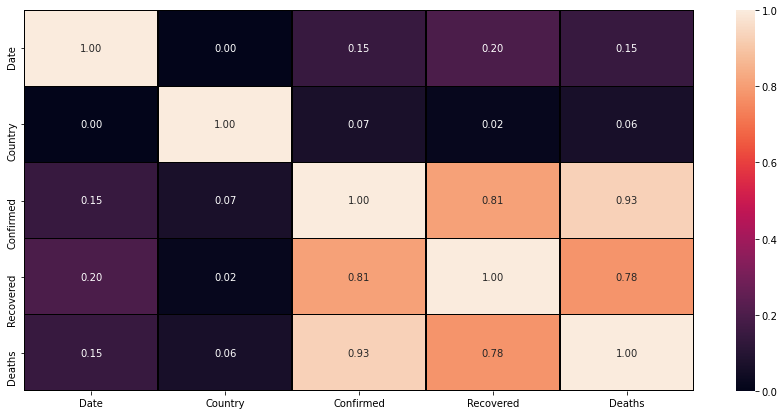

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,linecolor='black',fmt='.2f')

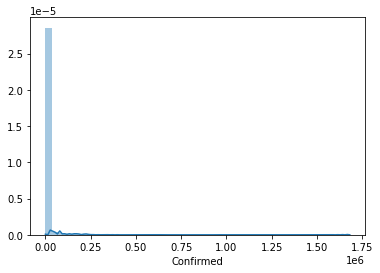

In [14]:
import seaborn as sns
sns.distplot(df['Confirmed'])

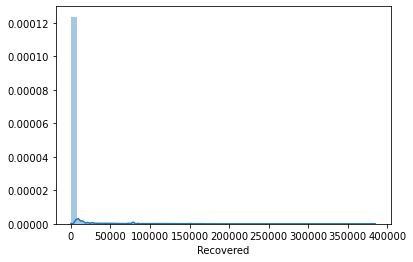

In [15]:
sns.distplot(df['Recovered'])

In [16]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(23688, 5)

In [17]:
threshold=3
print(np.where(z>3))

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
        9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
       11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
       13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
       13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
       14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
       14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
       14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
       15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
       15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
       15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
       15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
       15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
       15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
       16065, 16138

In [18]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(23688, 5)
(23177, 5)


In [19]:
loss_percent=(23688-23177)/23688*100
print(loss_percent)

2.157210401891253


In [20]:
df_new.skew()

Date         0.028720
Country     -0.005144
Confirmed    6.906829
Recovered    7.472281
Deaths       9.729360
dtype: float64

In [21]:
#log transformation
df_new['Deaths'] = np.log(1+df['Deaths'])

<ipython-input-21-42b59d7a30be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Deaths'] = np.log(1+df['Deaths'])


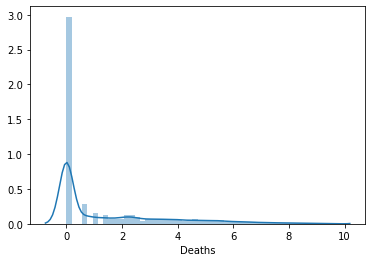

In [22]:
sns.distplot(df_new['Deaths'])

In [23]:
x=df_new.drop('Deaths',axis=1)
y=df_new['Deaths']

In [24]:
df_new['Recovered'] = np.log(1+df['Recovered'])

<ipython-input-24-f55f641c6809>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Recovered'] = np.log(1+df['Recovered'])


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [26]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"the model performs well")
        print("At random state:-",i)
        print("Training r2 score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2 score is:-", r2_score(y_test,pred_test)*100)

At random state 36 the model performs well
At random state:- 36
Training r2 score is:- 62.23607311839552
Testing r2 score is:- 62.22046608376284
At random state 57 the model performs well
At random state:- 57
Training r2 score is:- 62.2300913642404
Testing r2 score is:- 62.215420325935455
At random state 71 the model performs well
At random state:- 71
Training r2 score is:- 62.22194770069447
Testing r2 score is:- 62.23705522010575
At random state 133 the model performs well
At random state:- 133
Training r2 score is:- 62.23219651389298
Testing r2 score is:- 62.2176529227374
At random state 236 the model performs well
At random state:- 236
Training r2 score is:- 62.229681629646464
Testing r2 score is:- 62.22720742887302
At random state 237 the model performs well
At random state:- 237
Training r2 score is:- 62.21998254703316
Testing r2 score is:- 62.223157647244534
At random state 255 the model performs well
At random state:- 255
Training r2 score is:- 62.219024403646614
Testing r2 scor

# Regularization

# Lasso

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [29]:
parameters = {'alpha':[.0001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [30]:
ls= Lasso(alpha=0.01, random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
for j in range (70,100):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc=lsscore.mean()
    print("at cv:",j)
    print("cross val score:",lsc*100)
    print("R2 score:",lss*100)

at cv: 70
cross val score: 9.047010919490214
R2 score: 61.683129680061825
at cv: 71
cross val score: 9.033210843904662
R2 score: 61.683129680061825
at cv: 72
cross val score: 7.692620741634798
R2 score: 61.683129680061825
at cv: 73
cross val score: 7.695834383175118
R2 score: 61.683129680061825
at cv: 74
cross val score: 7.547398449763329
R2 score: 61.683129680061825
at cv: 75
cross val score: 8.233580048079345
R2 score: 61.683129680061825
at cv: 76
cross val score: 8.473102680631808
R2 score: 61.683129680061825
at cv: 77
cross val score: 8.706499651355518
R2 score: 61.683129680061825
at cv: 78
cross val score: 5.261154678956064
R2 score: 61.683129680061825
at cv: 79
cross val score: 5.874025177675772
R2 score: 61.683129680061825
at cv: 80
cross val score: 4.756933906423782
R2 score: 61.683129680061825
at cv: 81
cross val score: 5.1664013121079915
R2 score: 61.683129680061825
at cv: 82
cross val score: 4.919547491661
R2 score: 61.683129680061825
at cv: 83
cross val score: 5.61783925457

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=25,random_state=99)

In [34]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com = pd.DataFrame({'original':a,'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,3.828641,2.373793
1,0.000000,0.705170
2,0.000000,0.114337
3,0.000000,0.026487
4,0.000000,-0.185626
5,2.197225,2.480663
6,3.663562,1.447496
7,0.000000,2.049245
8,0.000000,1.734266
9,0.000000,-0.208096


In [35]:
import joblib
joblib.dump(RF,"Project19.pkl")

['Project19.pkl']